In [1]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
spill_data = pd.read_csv('spill_00011.txt', delim_whitespace=True, header=None)
spill_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,1,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.40
1,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,2,1.0,3.76,103.69,3720.0,0.98,30.07,0.0,4.72,0.19
2,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,3,1.0,3.75,103.67,3720.0,0.98,30.06,0.0,4.72,0.00
3,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,4,1.0,3.76,103.68,3720.0,0.98,30.07,0.0,4.72,1.32
4,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,5,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12796,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,2.04
12796,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12797,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.99
12797,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12798,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.31
12798,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12799,1.0,3.76,103.67,3720.0,0.98,30.06,0.0,4.72,9.13


# About the data format
#### The data is read in this format
#### Column 0-4   : YYYY MM DD HH MM
#### Column 5     : Forecast timesteps
#### Column 6     : Seconds since spill
#### Column 7     : Spillage amount
#### Column 8-11  : Latitude and Longitude of incident location (repeat)
#### Column 12    : Particle number (or tagging), there are 12,800 particles
#### Column 13    : Particle status.
#### Column 14-15 : Particle current location (lat, long)
#### Column 16    : Time to reach to current location
#### Column 17    : Density of the oil
#### Column 18    : SST
#### Column 19    : Emulsification rate (%)
#### Column 20    : Evaporation rate (% of what is left after evaporation)
#### Column 21    : Depth of the spill particle (0 - surface)

#### status*:
##### -10 : particle outside the range
##### -2  : missing particle
##### -1  : landed
##### 1   : particles on the surface
##### 5   : particles inide the water


In [3]:
# We choose the spill oil on the surface and landed
spilled_oil=spill_data[((spill_data[13]==1) | (spill_data[13]==-1)) ]
spilled_oil

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,1,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.40
1,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,2,1.0,3.76,103.69,3720.0,0.98,30.07,0.0,4.72,0.19
2,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,3,1.0,3.75,103.67,3720.0,0.98,30.06,0.0,4.72,0.00
3,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,4,1.0,3.76,103.68,3720.0,0.98,30.07,0.0,4.72,1.32
4,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,5,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12796,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,2.04
12796,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12797,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.99
12797,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12798,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.31
12798,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12799,1.0,3.76,103.67,3720.0,0.98,30.06,0.0,4.72,9.13


In [4]:
#We choose the same criteria above but the particles must be on surface
spilled_oil_surface=spill_data[((spill_data[13]==1) | (spill_data[13]==-1)) & (spill_data[21]==0.00)]
spilled_oil_surface

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
2,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,3,1.0,3.75,103.67,3720.0,0.98,30.06,0.0,4.72,0.0
4,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,5,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.0
5,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,6,1.0,3.76,103.67,3720.0,0.98,30.06,0.0,4.72,0.0
6,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,7,1.0,3.76,103.67,3720.0,0.98,30.06,0.0,4.72,0.0
7,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,8,1.0,3.76,103.68,3720.0,0.98,30.06,0.0,4.72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12766,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12767,1.0,3.75,103.67,3720.0,0.98,30.07,0.0,4.72,0.0
12767,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12768,1.0,3.76,103.68,3720.0,0.98,30.07,0.0,4.72,0.0
12771,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12772,1.0,3.76,103.67,3720.0,0.98,30.06,0.0,4.72,0.0
12773,2024,9,25,0,4,11,7200.0,8.0,3.77,103.65,...,12774,1.0,3.76,103.66,3720.0,0.98,30.06,0.0,4.72,0.0


# Plot the spillage for first case 

In [6]:
from shapely import wkt
from shapely.geometry import Point

spilled_oil[22] = [Point(xy) for xy in zip(spilled_oil[15], spilled_oil[14])] 
gdf=gpd.GeoDataFrame(spilled_oil, geometry=spilled_oil[22])

C:\Users\user\miniconda3\envs\MCS\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


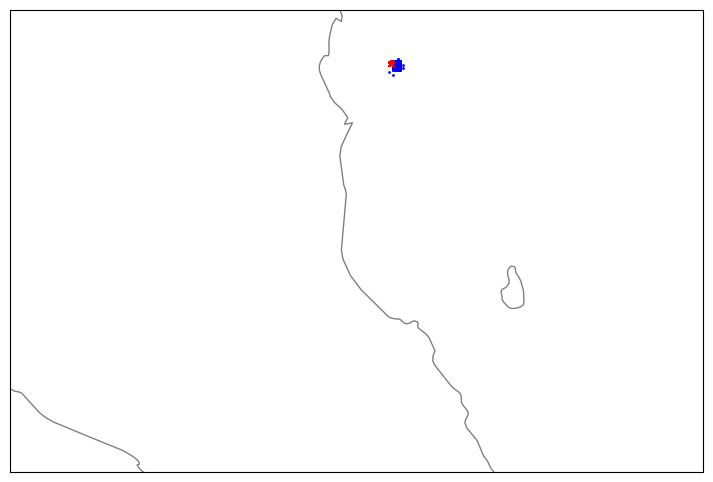

In [7]:
map_projection=ccrs.PlateCarree()

nrows=1
ncols=1

fig,ax=plt.subplots(nrows,ncols,figsize=(10,6),
                    subplot_kw={'projection':map_projection})

ax.set_extent([102,105,2,4])
gdf['geometry'].plot(marker='o', color='blue', markersize=1,transform=map_projection, ax=ax)
ax.plot(gdf[9],gdf[8],marker='*',color='red', markersize=5,transform=map_projection)
ax.coastlines(color='grey')
plt.savefig('17_float.png',dpi=300)

(3.0, 4.0)

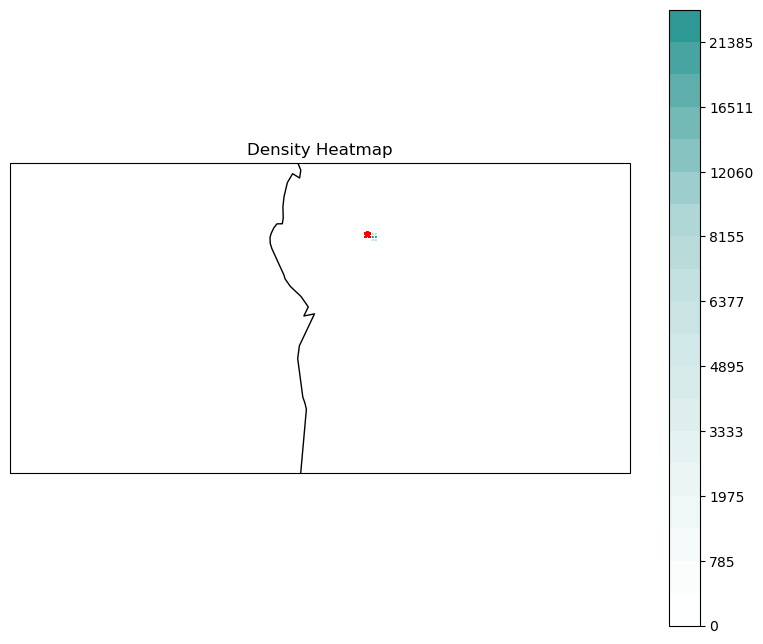

In [8]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create a figure with Cartopy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Create a custom colormap from white to viridis
viridis = plt.get_cmap('viridis')
white_to_viridis = LinearSegmentedColormap.from_list('white_to_viridis', ['white', viridis(0.5)])

sns.kdeplot(
    x=spilled_oil[15], 
    y=spilled_oil[14], 
    fill=True, 
    cmap=white_to_viridis, 
    thresh=0,  # Show all densities
    levels=20,  # Number of contour levels
    ax=ax,cbar=True
)

ax.plot(gdf[9],gdf[8],marker='*',color='red', markersize=5,transform=map_projection)
ax.coastlines()
ax.set_title('Density Heatmap')
plt.xlim(102.5,104.5)
plt.ylim(3, 4)

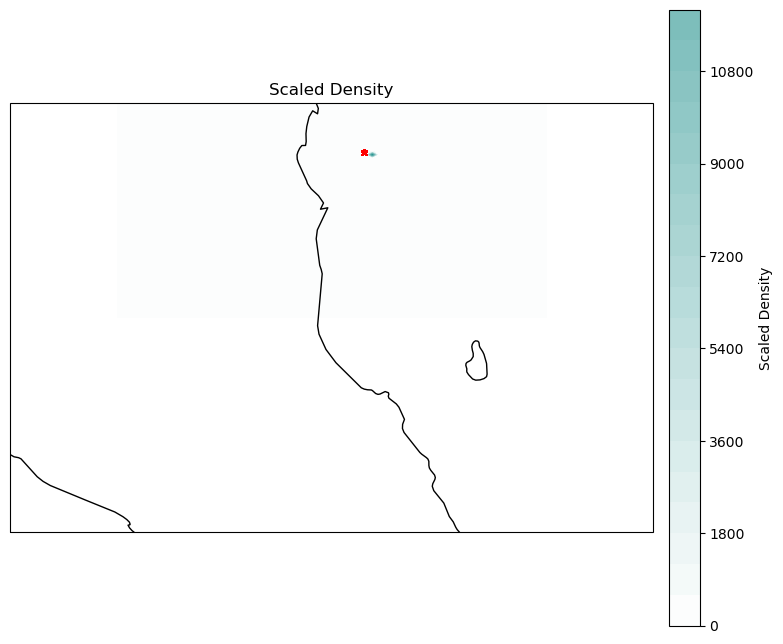

In [9]:
import numpy as np
from scipy.stats import gaussian_kde

# Create a custom colormap from white to viridis
viridis = plt.get_cmap('viridis')
white_to_viridis = LinearSegmentedColormap.from_list('white_to_viridis', ['white', viridis(0.5)])

#Create a figure with Cartopy
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Multiply the density values by a constant (e.g., 10)
# Create a grid for the density values
x = np.linspace(102.5, 104.5, 80)
y = np.linspace(3, 4, 80)
X, Y = np.meshgrid(x, y)

# Compute the KDE
kde = gaussian_kde([spilled_oil[15], spilled_oil[14]])
density = kde(np.vstack([X.ravel(), Y.ravel()]))  # Evaluate on the grid

# Reshape the density to match the grid
density = density.reshape(X.shape)

# Scale the density
scaled_density = density * 8  # Change 8 to your desired constant

# Plot the scaled density using contourf
contour = ax.contourf(X, Y, scaled_density, levels=20, cmap=white_to_viridis, alpha=0.6)

ax.plot(gdf[9],gdf[8],marker='*',color='red', markersize=5,transform=map_projection)

# Add features
ax.coastlines()
ax.set_title('Scaled Density')
plt.xlim(102, 105)
plt.ylim(2, 4)

# Add a colorbar
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Scaled Density')



# Plot the surface oil spill only

In [ ]:
spilled_oil_surface[22] = [Point(xy) for xy in zip(spilled_oil_surface[15], spilled_oil_surface[14])] 
gdf_surface=gpd.GeoDataFrame(spilled_oil_surface, geometry=spilled_oil_surface[22])

In [ ]:
map_projection=ccrs.PlateCarree()

nrows=1
ncols=1

fig,ax=plt.subplots(nrows,ncols,figsize=(10,6),
                    subplot_kw={'projection':map_projection})

ax.set_extent([102,105,2,4])
gdf_surface['geometry'].plot(marker='o', color='green', markersize=1,transform=map_projection, ax=ax)
ax.plot(gdf_surface[9],gdf_surface[8],marker='*',color='red', markersize=5,transform=map_projection)
ax.coastlines(color='grey')
plt.savefig('17_surface.png',dpi=300)

In [ ]:
# Volume/Number of Particles in the same lat lon